## Pre Processing Steps

1. Read the data
2. Describe both numeric and categorical variables
3. Choose variable of interest
4. Missing value treatment
5. Feature Engineering
6. Correlation check
7. VIF check
8. Outlier treatment
9. If regression then check linearity option
10. Conversions 
11. Scaling the data
12. Declare the inputs and the targets


In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

from sklearn.linear_model import LinearRegression

import seaborn as sns
sns.set()

In [265]:
data = pd.read_csv(r'real_life_example.csv')

data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Exploring the descriptive statistics of the variables

In [266]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Dealing with missing values

In [267]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [268]:
data = data.dropna(axis=0)

In [269]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring the Outliers

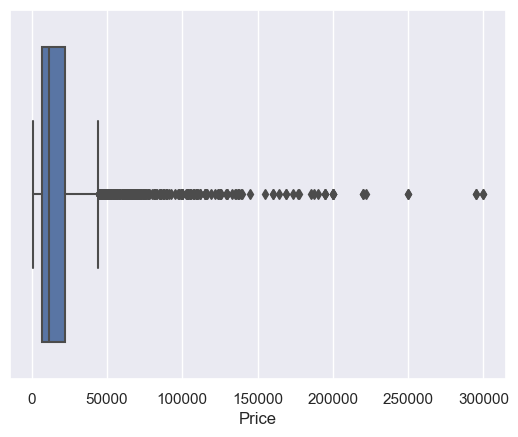

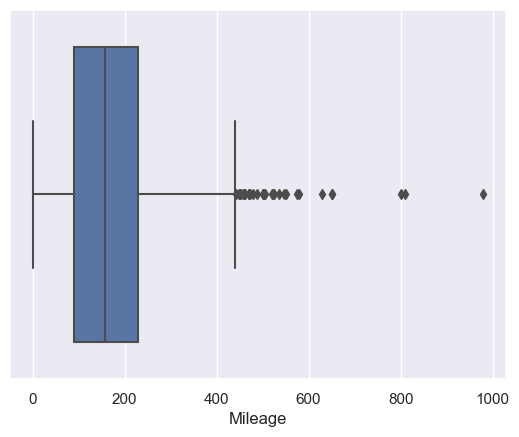

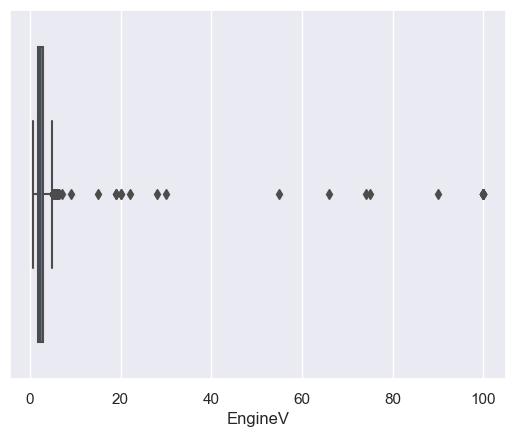

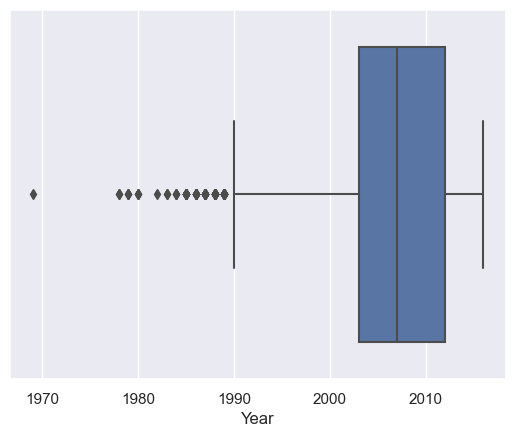

In [270]:
for i in data.columns:
    if data[i].dtypes!=object:
        sns.boxplot(data=data,x=data[i])
        plt.show()
    

In [271]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_66464/3326136409.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1=data.quantile(0.25)
/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_66464/3326136409.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3=data.quantile(0.75)


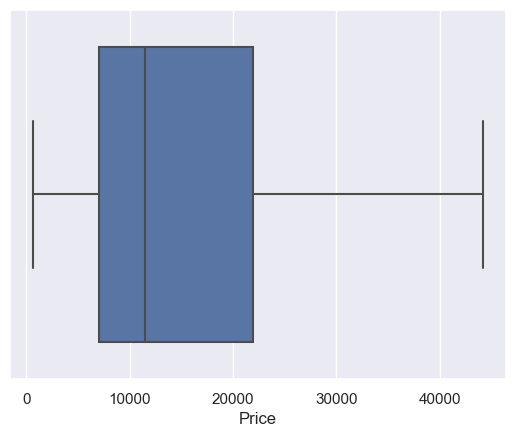

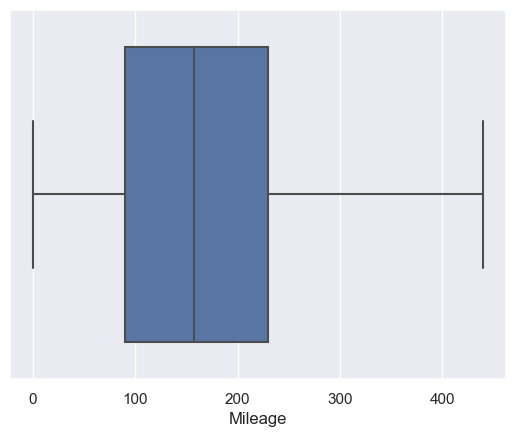

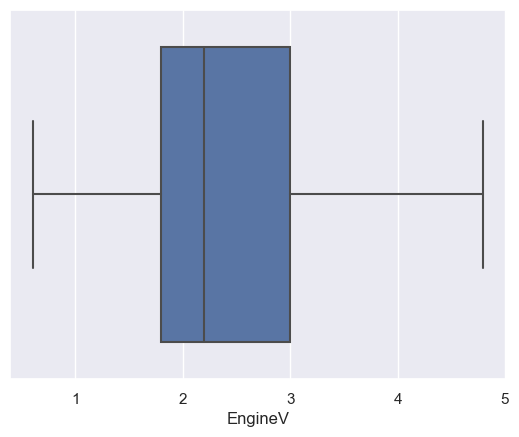

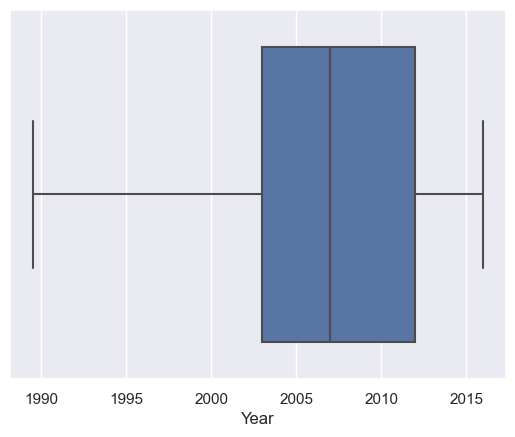

In [272]:
for i in data.columns:
    if data[i].dtypes!=object:
        data[i] = np.where(data[i] > Upper[i],Upper[i],data[i])
        data[i] = np.where(data[i] < Lower[i],Lower[i],data[i])
        sns.boxplot(data=data,x=data[i])
        plt.show()

## Create additional features

In [273]:
data.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'],
      dtype='object')

In [274]:
statistics = ['mean', 'sum', 'min', 'max']

In [275]:
for i in statistics:
    result = data.groupby(['Engine Type']).agg({'EngineV': [i]})
    result.columns = [f'EngineV_{i}_by_Engine_Type']
    result.reset_index(inplace=True)
    
    data = pd.merge(data, result, on='Engine Type', how='left')
    
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,EngineV_mean_by_Engine_Type,EngineV_sum_by_Engine_Type,EngineV_min_by_Engine_Type,EngineV_max_by_Engine_Type
0,BMW,4200.0,sedan,277.0,2.0,Petrol,yes,1991.0,320,2.533093,3718.58,0.6,4.8
1,Mercedes-Benz,7900.0,van,427.0,2.9,Diesel,yes,1999.0,Sprinter 212,2.335347,4346.08,1.0,4.8
2,Mercedes-Benz,13300.0,sedan,358.0,4.8,Gas,yes,2003.0,S 500,2.661695,1570.40,1.0,4.8
3,Audi,23000.0,crossover,240.0,4.2,Petrol,yes,2007.0,Q7,2.533093,3718.58,0.6,4.8
4,Toyota,18300.0,crossover,120.0,2.0,Petrol,yes,2011.0,Rav 4,2.533093,3718.58,0.6,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,Toyota,17900.0,sedan,35.0,1.6,Petrol,yes,2014.0,Corolla,2.533093,3718.58,0.6,4.8
4021,Mercedes-Benz,44251.5,sedan,9.0,3.0,Diesel,yes,2014.0,S 350,2.335347,4346.08,1.0,4.8
4022,BMW,6500.0,sedan,1.0,3.5,Petrol,yes,1999.0,535,2.533093,3718.58,0.6,4.8
4023,BMW,8000.0,sedan,194.0,2.0,Petrol,yes,1989.5,520,2.533093,3718.58,0.6,4.8


In [276]:
data.columns

Index(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'EngineV_mean_by_Engine_Type',
       'EngineV_sum_by_Engine_Type', 'EngineV_min_by_Engine_Type',
       'EngineV_max_by_Engine_Type'],
      dtype='object')

In [277]:
for i in data.columns[-4:]:
    print(i)
    print(data[i].value_counts())

EngineV_mean_by_Engine_Type
2.335347    1861
2.533093    1468
2.661695     590
2.322170     106
Name: EngineV_mean_by_Engine_Type, dtype: int64
EngineV_sum_by_Engine_Type
4346.08    1861
3718.58    1468
1570.40     590
246.15      106
Name: EngineV_sum_by_Engine_Type, dtype: int64
EngineV_min_by_Engine_Type
1.00    2451
0.60    1468
0.65     106
Name: EngineV_min_by_Engine_Type, dtype: int64
EngineV_max_by_Engine_Type
4.8    4025
Name: EngineV_max_by_Engine_Type, dtype: int64


In [278]:
data.drop('EngineV_max_by_Engine_Type', axis=1, inplace=True)

In [279]:
for i in statistics:
    result = data.groupby(['Year']).agg({'Mileage': [i]})
    result.columns = [f'Mileage_{i}_by_Year']
    result.reset_index(inplace=True)
    
    data = pd.merge(data, result, on='Year', how='left')
    
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,EngineV_mean_by_Engine_Type,EngineV_sum_by_Engine_Type,EngineV_min_by_Engine_Type,Mileage_mean_by_Year,Mileage_sum_by_Year,Mileage_min_by_Year,Mileage_max_by_Year
0,BMW,4200.0,sedan,277.0,2.0,Petrol,yes,1991.0,320,2.533093,3718.58,0.6,306.032258,9487.0,3.0,440.0
1,Mercedes-Benz,7900.0,van,427.0,2.9,Diesel,yes,1999.0,Sprinter 212,2.335347,4346.08,1.0,256.310680,26400.0,1.0,440.0
2,Mercedes-Benz,13300.0,sedan,358.0,4.8,Gas,yes,2003.0,S 500,2.661695,1570.40,1.0,223.589404,33762.0,1.0,406.0
3,Audi,23000.0,crossover,240.0,4.2,Petrol,yes,2007.0,Q7,2.533093,3718.58,0.6,164.323353,54884.0,1.0,390.0
4,Toyota,18300.0,crossover,120.0,2.0,Petrol,yes,2011.0,Rav 4,2.533093,3718.58,0.6,124.076159,37471.0,1.0,280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,Toyota,17900.0,sedan,35.0,1.6,Petrol,yes,2014.0,Corolla,2.533093,3718.58,0.6,45.965986,6757.0,0.0,160.0
4021,Mercedes-Benz,44251.5,sedan,9.0,3.0,Diesel,yes,2014.0,S 350,2.335347,4346.08,1.0,45.965986,6757.0,0.0,160.0
4022,BMW,6500.0,sedan,1.0,3.5,Petrol,yes,1999.0,535,2.533093,3718.58,0.6,256.310680,26400.0,1.0,440.0
4023,BMW,8000.0,sedan,194.0,2.0,Petrol,yes,1989.5,520,2.533093,3718.58,0.6,240.752475,24316.0,1.0,440.0


In [280]:
for i in data.columns[-4:]:
    print(i)
    print(data[i].value_counts())

Mileage_mean_by_Year
148.038168    393
114.074405    336
164.323353    334
124.076159    302
87.991770     243
1.435407      209
183.835000    200
204.414773    176
131.273810    168
215.967949    156
223.589404    151
45.965986     147
260.633803    142
237.834586    133
133.015748    127
228.176000    125
256.310680    103
240.752475    101
17.896552      87
273.066667     75
282.783784     74
277.333333     63
276.431818     44
274.135135     37
306.032258     31
298.200000     25
259.920000     25
252.111111     18
Name: Mileage_mean_by_Year, dtype: int64
Mileage_sum_by_Year
58179.0    393
38329.0    336
54884.0    334
37471.0    302
21382.0    243
300.0      209
36767.0    200
35977.0    176
22054.0    168
33691.0    156
33762.0    151
6757.0     147
37010.0    142
31632.0    133
16893.0    127
28522.0    125
26400.0    103
24316.0    101
1557.0      87
20480.0     75
20926.0     74
17472.0     63
12163.0     44
10143.0     37
9487.0      31
7455.0      25
6498.0      25
4538.0   

In [281]:
for i in statistics:
    result = data.groupby(['Brand']).agg({'EngineV': [i]})
    result.columns = [f'EngineV_{i}_by_Brand']
    result.reset_index(inplace=True)
    
    data = pd.merge(data, result, on='Brand', how='left')
    
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,EngineV_mean_by_Engine_Type,EngineV_sum_by_Engine_Type,EngineV_min_by_Engine_Type,Mileage_mean_by_Year,Mileage_sum_by_Year,Mileage_min_by_Year,Mileage_max_by_Year,EngineV_mean_by_Brand,EngineV_sum_by_Brand,EngineV_min_by_Brand,EngineV_max_by_Brand
0,BMW,4200.0,sedan,277.0,2.0,Petrol,yes,1991.0,320,2.533093,3718.58,0.6,306.032258,9487.0,3.0,440.0,2.828750,1810.40,0.65,4.8
1,Mercedes-Benz,7900.0,van,427.0,2.9,Diesel,yes,1999.0,Sprinter 212,2.335347,4346.08,1.0,256.310680,26400.0,1.0,440.0,2.909307,2394.36,0.60,4.8
2,Mercedes-Benz,13300.0,sedan,358.0,4.8,Gas,yes,2003.0,S 500,2.661695,1570.40,1.0,223.589404,33762.0,1.0,406.0,2.909307,2394.36,0.60,4.8
3,Audi,23000.0,crossover,240.0,4.2,Petrol,yes,2007.0,Q7,2.533093,3718.58,0.6,164.323353,54884.0,1.0,390.0,2.578500,1082.97,1.20,4.8
4,Toyota,18300.0,crossover,120.0,2.0,Petrol,yes,2011.0,Rav 4,2.533093,3718.58,0.6,124.076159,37471.0,1.0,280.0,2.729118,1391.85,1.00,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,Toyota,17900.0,sedan,35.0,1.6,Petrol,yes,2014.0,Corolla,2.533093,3718.58,0.6,45.965986,6757.0,0.0,160.0,2.729118,1391.85,1.00,4.8
4021,Mercedes-Benz,44251.5,sedan,9.0,3.0,Diesel,yes,2014.0,S 350,2.335347,4346.08,1.0,45.965986,6757.0,0.0,160.0,2.909307,2394.36,0.60,4.8
4022,BMW,6500.0,sedan,1.0,3.5,Petrol,yes,1999.0,535,2.533093,3718.58,0.6,256.310680,26400.0,1.0,440.0,2.828750,1810.40,0.65,4.8
4023,BMW,8000.0,sedan,194.0,2.0,Petrol,yes,1989.5,520,2.533093,3718.58,0.6,240.752475,24316.0,1.0,440.0,2.828750,1810.40,0.65,4.8


In [282]:
for i in data.columns[-4:]:
    print(i)
    print(data[i].value_counts())

EngineV_mean_by_Brand
1.992136    880
2.909307    823
2.828750    640
2.729118    510
1.709326    445
2.578500    420
2.240717    307
Name: EngineV_mean_by_Brand, dtype: int64
EngineV_sum_by_Brand
1753.08    880
2394.36    823
1810.40    640
1391.85    510
760.65     445
1082.97    420
687.90     307
Name: EngineV_sum_by_Brand, dtype: int64
EngineV_min_by_Brand
1.00    1835
0.60     823
0.65     640
1.20     420
1.30     307
Name: EngineV_min_by_Brand, dtype: int64
EngineV_max_by_Brand
4.8    4025
Name: EngineV_max_by_Brand, dtype: int64


In [283]:
data.drop('EngineV_max_by_Brand', axis=1, inplace=True)

In [284]:
for i in statistics:
    result = data.groupby(['Engine Type', 'Body']).agg({'EngineV': [i]})
    result.columns = [f'EngineV_{i}_by_Engine_Type_Body_Type']
    result.reset_index(inplace=True)
    
    data = pd.merge(data, result, on=['Engine Type', 'Body'], how='left')
    
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,EngineV_mean_by_Engine_Type,...,Mileage_sum_by_Year,Mileage_min_by_Year,Mileage_max_by_Year,EngineV_mean_by_Brand,EngineV_sum_by_Brand,EngineV_min_by_Brand,EngineV_mean_by_Engine_Type_Body_Type,EngineV_sum_by_Engine_Type_Body_Type,EngineV_min_by_Engine_Type_Body_Type,EngineV_max_by_Engine_Type_Body_Type
0,BMW,4200.0,sedan,277.0,2.0,Petrol,yes,1991.0,320,2.533093,...,9487.0,3.0,440.0,2.828750,1810.40,0.65,2.474280,1942.31,1.2,4.8
1,Mercedes-Benz,7900.0,van,427.0,2.9,Diesel,yes,1999.0,Sprinter 212,2.335347,...,26400.0,1.0,440.0,2.909307,2394.36,0.60,2.036772,1154.85,1.0,4.8
2,Mercedes-Benz,13300.0,sedan,358.0,4.8,Gas,yes,2003.0,S 500,2.661695,...,33762.0,1.0,406.0,2.909307,2394.36,0.60,2.451007,730.40,1.2,4.8
3,Audi,23000.0,crossover,240.0,4.2,Petrol,yes,2007.0,Q7,2.533093,...,54884.0,1.0,390.0,2.578500,1082.97,1.20,3.352759,875.07,1.2,4.8
4,Toyota,18300.0,crossover,120.0,2.0,Petrol,yes,2011.0,Rav 4,2.533093,...,37471.0,1.0,280.0,2.729118,1391.85,1.00,3.352759,875.07,1.2,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,Toyota,17900.0,sedan,35.0,1.6,Petrol,yes,2014.0,Corolla,2.533093,...,6757.0,0.0,160.0,2.729118,1391.85,1.00,2.474280,1942.31,1.2,4.8
4021,Mercedes-Benz,44251.5,sedan,9.0,3.0,Diesel,yes,2014.0,S 350,2.335347,...,6757.0,0.0,160.0,2.909307,2394.36,0.60,2.483079,1008.13,1.4,4.8
4022,BMW,6500.0,sedan,1.0,3.5,Petrol,yes,1999.0,535,2.533093,...,26400.0,1.0,440.0,2.828750,1810.40,0.65,2.474280,1942.31,1.2,4.8
4023,BMW,8000.0,sedan,194.0,2.0,Petrol,yes,1989.5,520,2.533093,...,24316.0,1.0,440.0,2.828750,1810.40,0.65,2.474280,1942.31,1.2,4.8


In [285]:
for i in data.columns[-4:]:
    print(i)
    print(data[i].value_counts())

EngineV_mean_by_Engine_Type_Body_Type
2.474280    785
2.036772    567
2.483079    406
2.928721    383
2.451007    298
2.025407    270
3.352759    261
2.312022    178
3.368966    174
2.824706    170
1.523988    163
1.985781     64
1.807018     57
2.526667     45
2.241176     34
1.609375     32
2.629032     31
1.820000     25
2.123810     21
1.825000     16
2.246667     15
2.184615     13
2.013636     11
3.166667      6
Name: EngineV_mean_by_Engine_Type_Body_Type, dtype: int64
EngineV_sum_by_Engine_Type_Body_Type
1942.31    785
1154.85    567
1008.13    406
1121.70    383
730.40     298
546.86     270
875.07     261
411.54     178
586.20     174
480.20     170
248.41     163
127.09      64
103.00      57
113.70      45
76.20       34
51.50       32
81.50       31
45.50       25
44.60       21
29.20       16
33.70       15
28.40       13
22.15       11
19.00        6
Name: EngineV_sum_by_Engine_Type_Body_Type, dtype: int64
EngineV_min_by_Engine_Type_Body_Type
1.20    1480
1.00    1045
1.5

In [286]:
statistics_cat = ['count', 'nunique']

In [287]:
for i in statistics_cat:
    result = data.groupby(['Brand']).agg({'Model': [i]})
    result.columns = [f'Model_{i}_by_Brand']
    result.reset_index(inplace=True)
    
    data = pd.merge(data, result, on='Brand', how='left')
    
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,EngineV_mean_by_Engine_Type,...,Mileage_max_by_Year,EngineV_mean_by_Brand,EngineV_sum_by_Brand,EngineV_min_by_Brand,EngineV_mean_by_Engine_Type_Body_Type,EngineV_sum_by_Engine_Type_Body_Type,EngineV_min_by_Engine_Type_Body_Type,EngineV_max_by_Engine_Type_Body_Type,Model_count_by_Brand,Model_nunique_by_Brand
0,BMW,4200.0,sedan,277.0,2.0,Petrol,yes,1991.0,320,2.533093,...,440.0,2.828750,1810.40,0.65,2.474280,1942.31,1.2,4.8,640,49
1,Mercedes-Benz,7900.0,van,427.0,2.9,Diesel,yes,1999.0,Sprinter 212,2.335347,...,440.0,2.909307,2394.36,0.60,2.036772,1154.85,1.0,4.8,823,108
2,Mercedes-Benz,13300.0,sedan,358.0,4.8,Gas,yes,2003.0,S 500,2.661695,...,406.0,2.909307,2394.36,0.60,2.451007,730.40,1.2,4.8,823,108
3,Audi,23000.0,crossover,240.0,4.2,Petrol,yes,2007.0,Q7,2.533093,...,390.0,2.578500,1082.97,1.20,3.352759,875.07,1.2,4.8,420,20
4,Toyota,18300.0,crossover,120.0,2.0,Petrol,yes,2011.0,Rav 4,2.533093,...,280.0,2.729118,1391.85,1.00,3.352759,875.07,1.2,4.8,510,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,Toyota,17900.0,sedan,35.0,1.6,Petrol,yes,2014.0,Corolla,2.533093,...,160.0,2.729118,1391.85,1.00,2.474280,1942.31,1.2,4.8,510,36
4021,Mercedes-Benz,44251.5,sedan,9.0,3.0,Diesel,yes,2014.0,S 350,2.335347,...,160.0,2.909307,2394.36,0.60,2.483079,1008.13,1.4,4.8,823,108
4022,BMW,6500.0,sedan,1.0,3.5,Petrol,yes,1999.0,535,2.533093,...,440.0,2.828750,1810.40,0.65,2.474280,1942.31,1.2,4.8,640,49
4023,BMW,8000.0,sedan,194.0,2.0,Petrol,yes,1989.5,520,2.533093,...,440.0,2.828750,1810.40,0.65,2.474280,1942.31,1.2,4.8,640,49


## Distribution of data

### 1st way plots

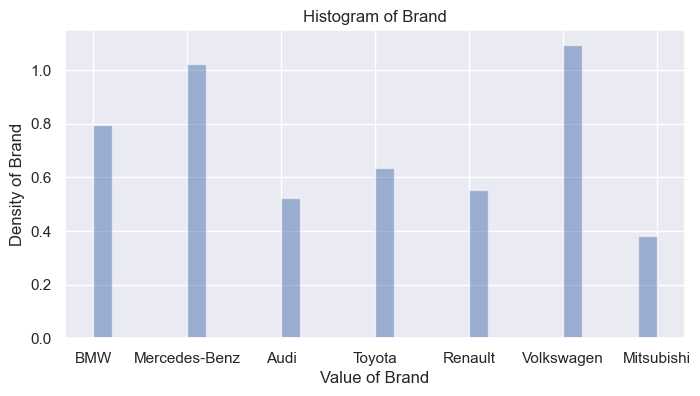

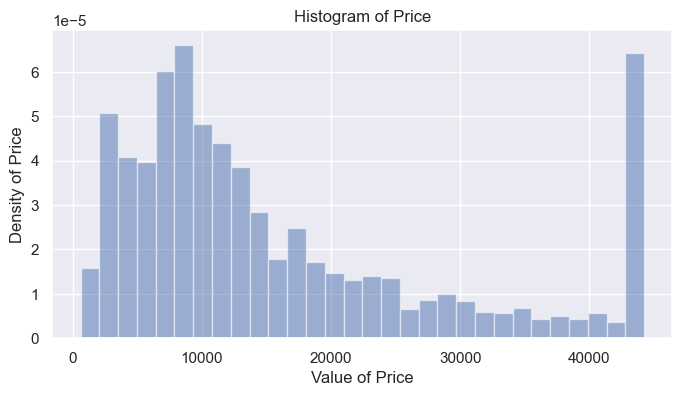

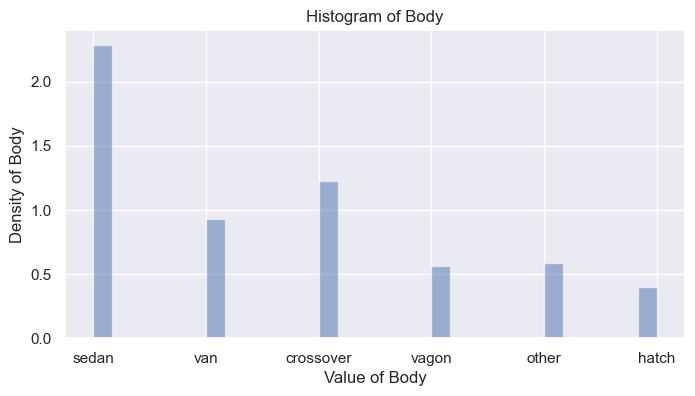

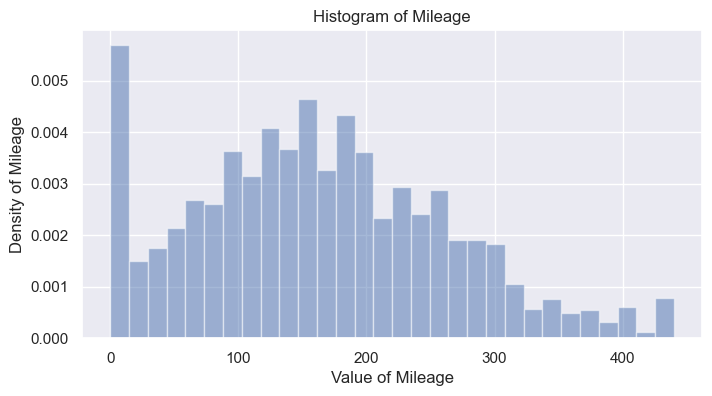

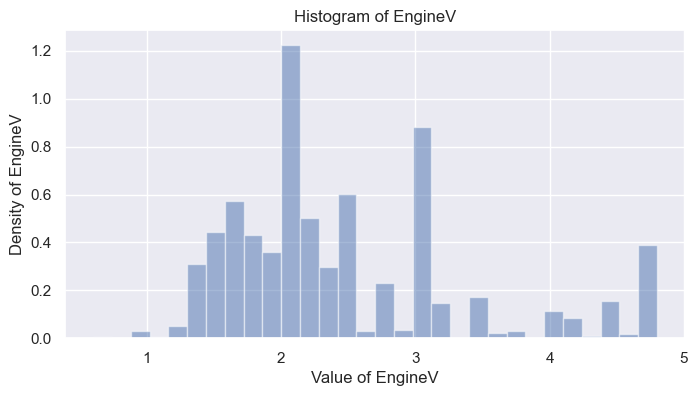

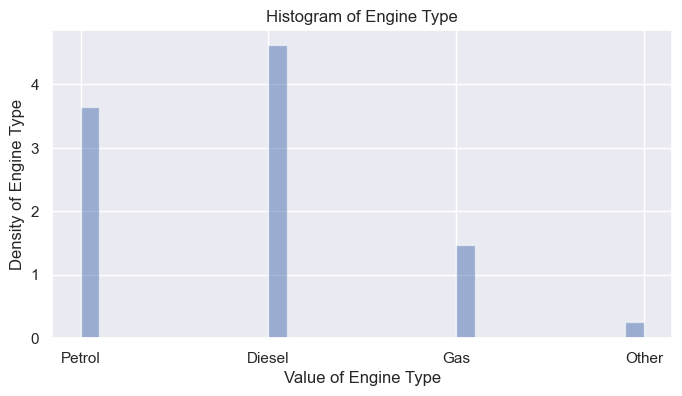

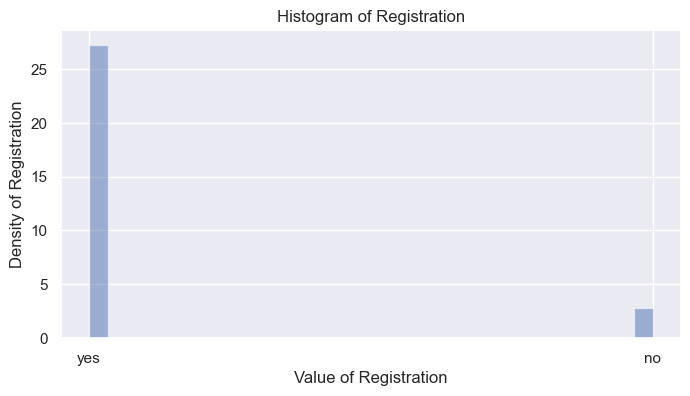

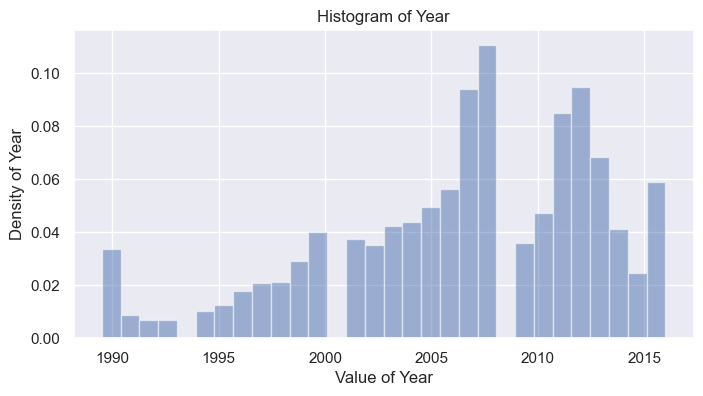

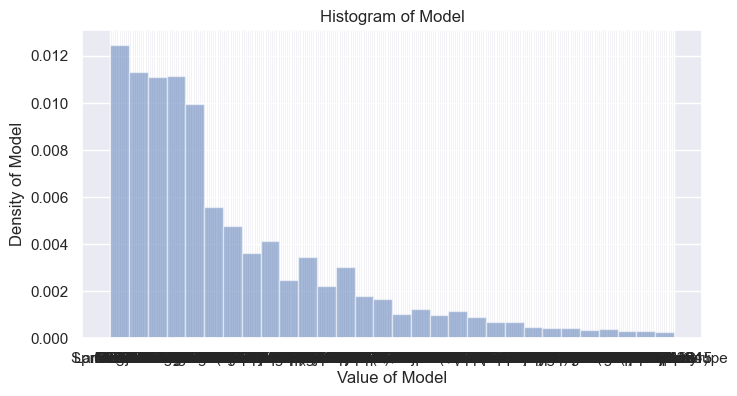

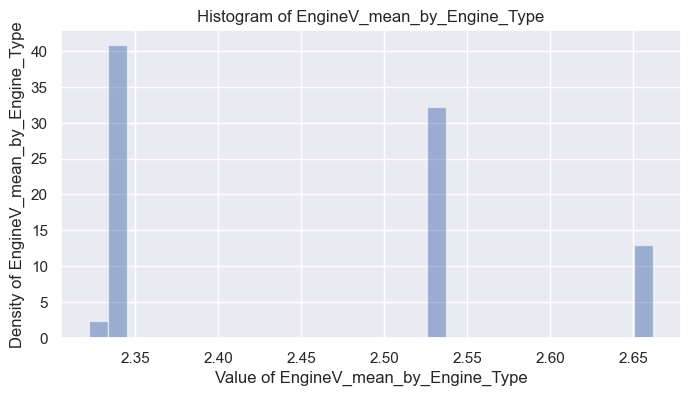

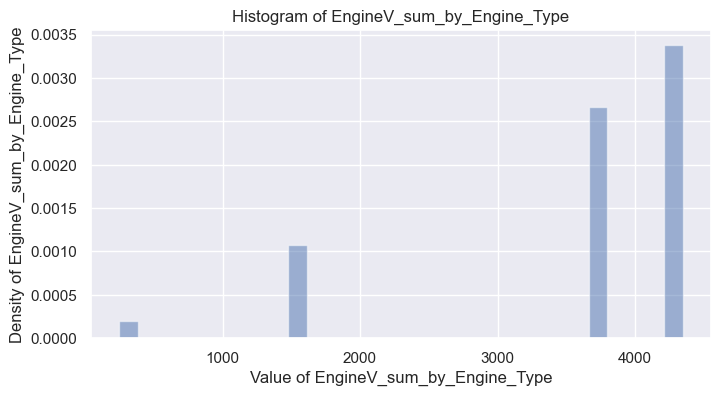

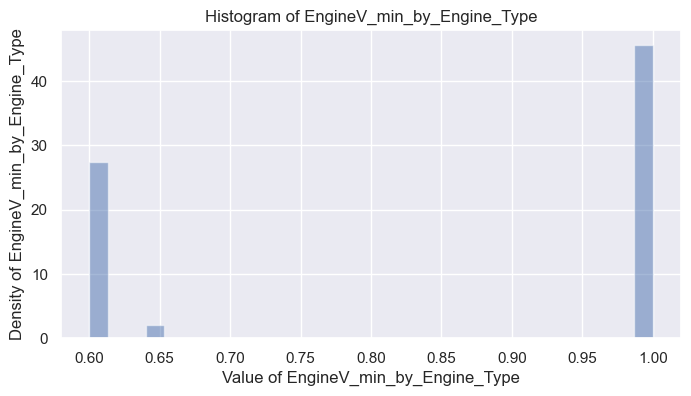

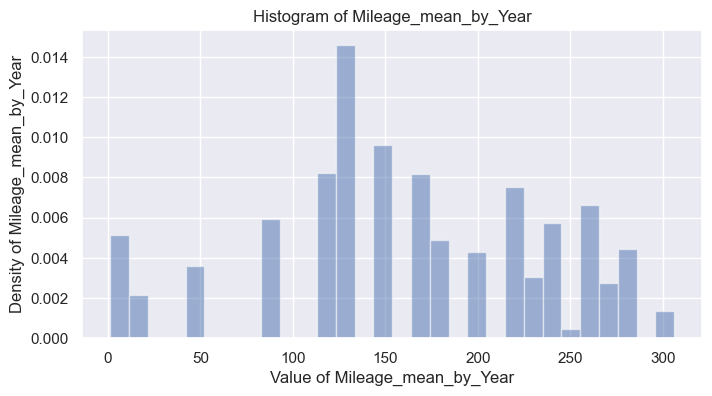

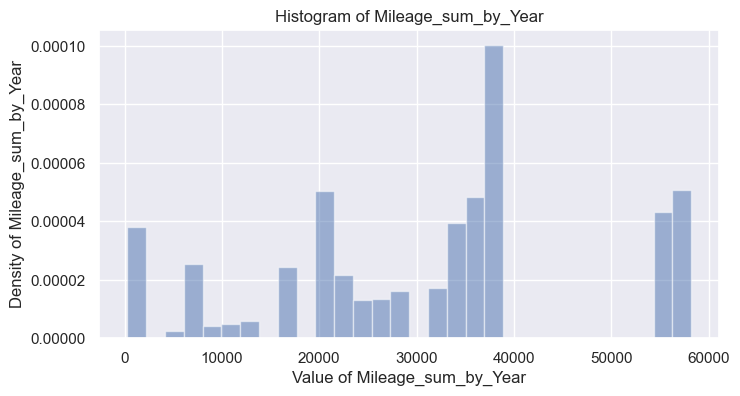

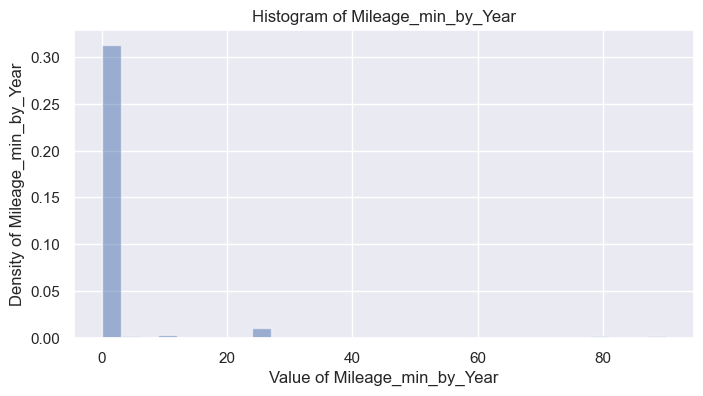

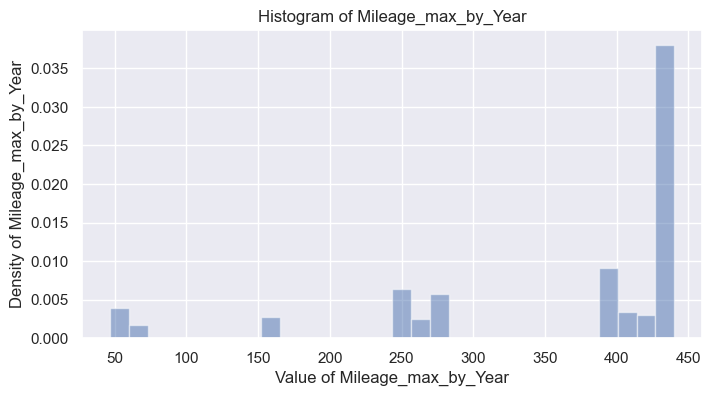

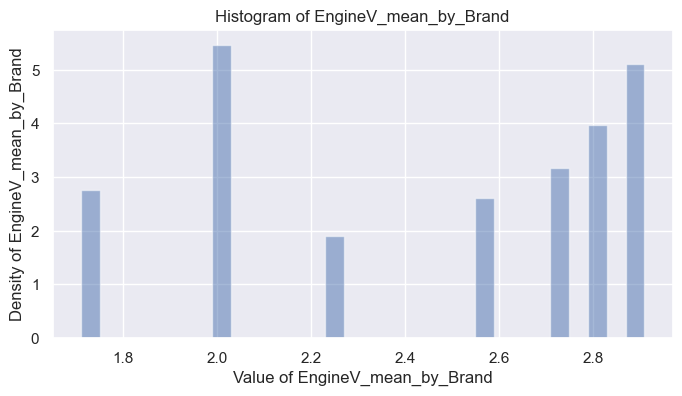

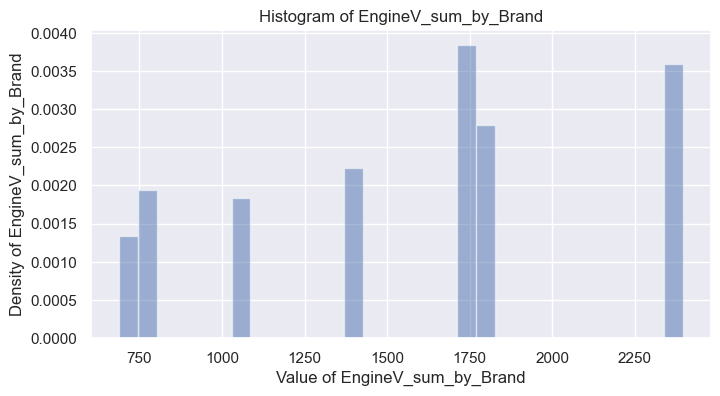

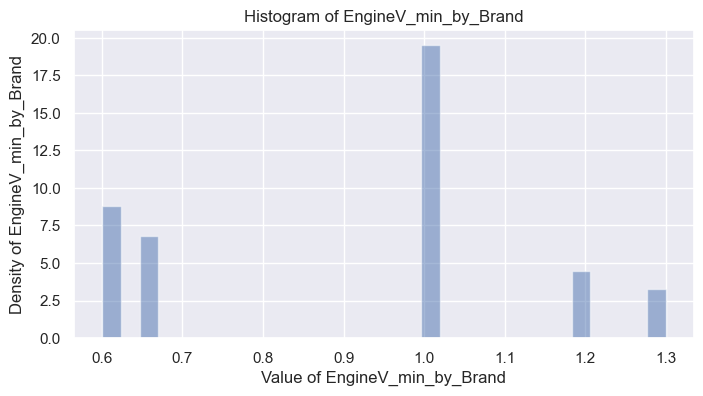

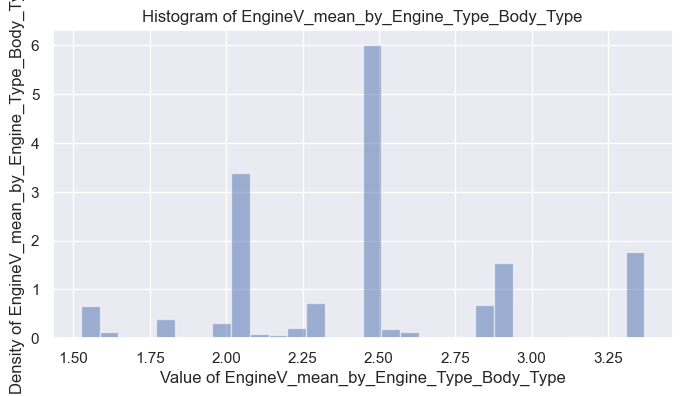

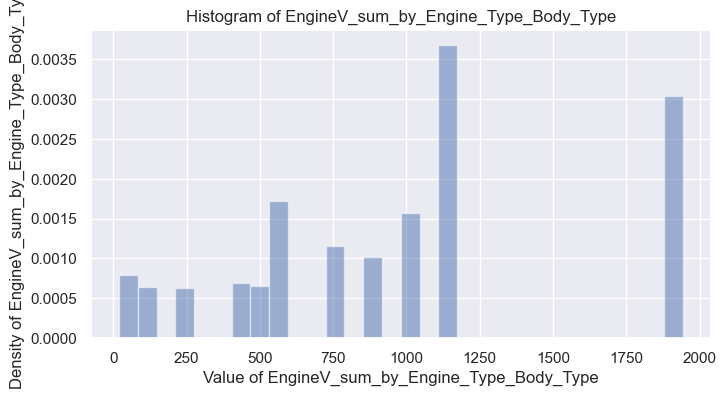

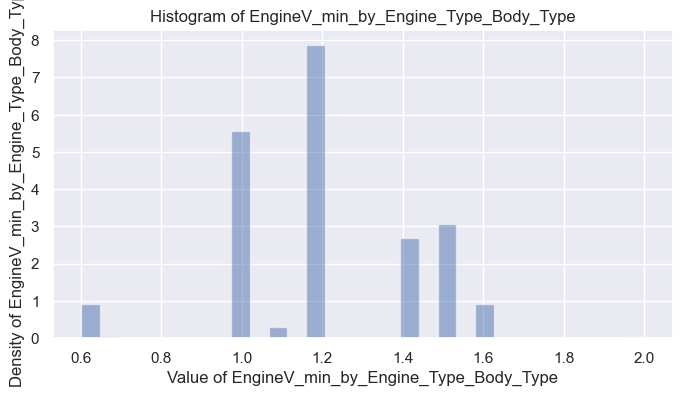

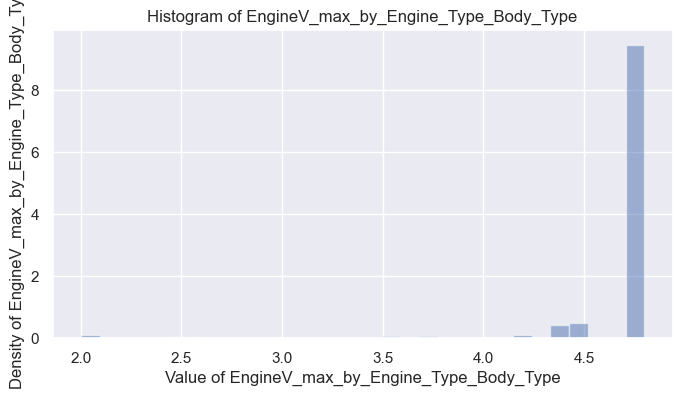

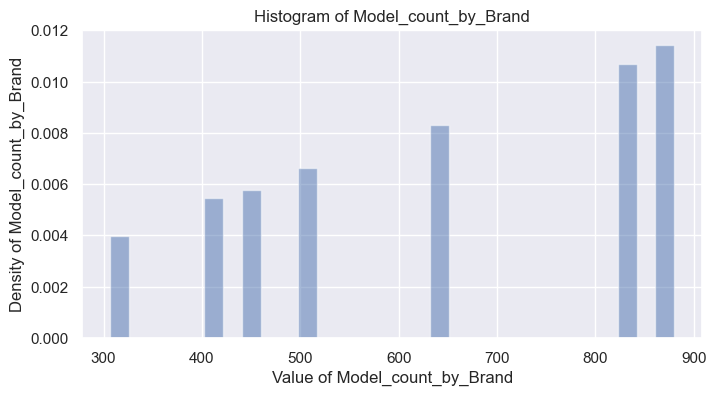

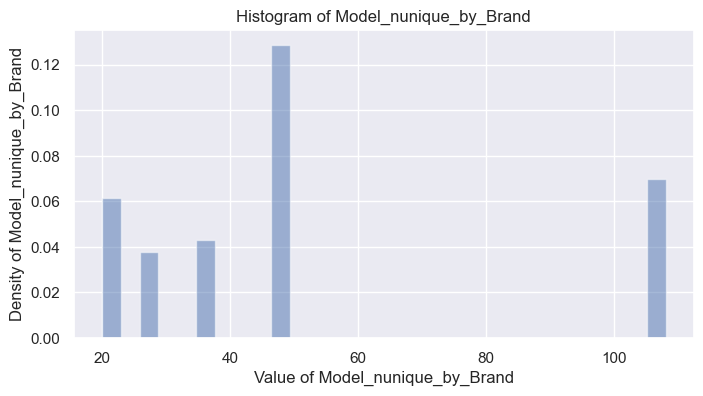

In [288]:
for i in data.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(data[i], bins=30, density=True, alpha=0.5)
    plt.title(f'Histogram of {i}')
    plt.xlabel(f'Value of {i}')
    plt.ylabel(f'Density of {i}')
    plt.show()

### 2nd way pandas skew method

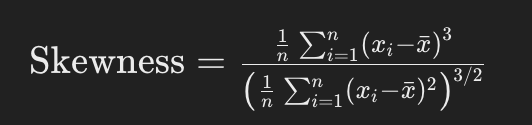



Where:
- \( n \) is the number of observations.
- \( x_i \) is the value of the \( i \)-th observation.
- \( {x_hat} \) is the mean of the dataset.


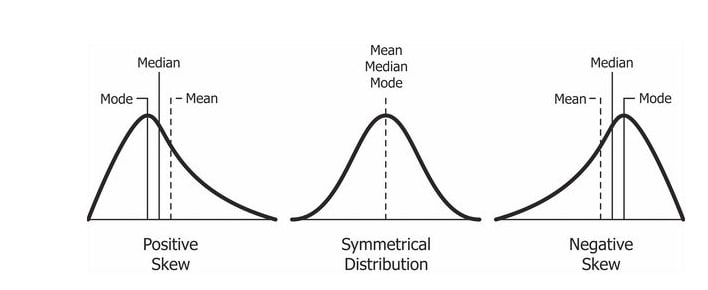

In [289]:
for i in data.columns:
    if data[i].dtypes!=object:
        skewness = data[i].skew()
        if -0.5 <= skewness <= 0.5:
            print(f"Skewness of column '{i}': {skewness} and distribution is approximately normal.")
        elif skewness < -0.5:
            print(f"Skewness of column '{i}': {skewness} and distribution is left-skewed.")
        else:
            print(f"Skewness of column '{i}': {skewness} and distribution is right-skewed.")
    else:
        print(f"Column '{i}' contains non-numeric data.")

Column 'Brand' contains non-numeric data.
Skewness of column 'Price': 1.0957337088056232 and distribution is right-skewed.
Column 'Body' contains non-numeric data.
Skewness of column 'Mileage': 0.3697874568011564 and distribution is approximately normal.
Skewness of column 'EngineV': 1.1326716609644323 and distribution is right-skewed.
Column 'Engine Type' contains non-numeric data.
Column 'Registration' contains non-numeric data.
Skewness of column 'Year': -0.7431761844981015 and distribution is left-skewed.
Column 'Model' contains non-numeric data.
Skewness of column 'EngineV_mean_by_Engine_Type': 0.31728564242186486 and distribution is approximately normal.
Skewness of column 'EngineV_sum_by_Engine_Type': -1.6238548100800871 and distribution is left-skewed.
Skewness of column 'EngineV_min_by_Engine_Type': -0.4513325120610496 and distribution is approximately normal.
Skewness of column 'Mileage_mean_by_Year': -0.2776491115255988 and distribution is approximately normal.
Skewness of c

### 3rd way statistical calculations

### Kolmogorov-Smirnov Test and p value

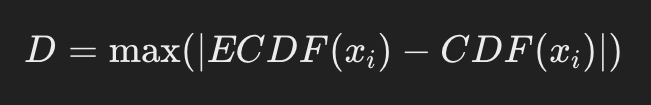

- ECDF is the empirical cumulative distribution function (ECDF) of the sample at the i th observation.

- CDF is the cumulative distribution function (CDF) of the normal distribution at the i th observation.

#### X={2.1,3.2,4.5,5.7,6.8}

#### μ=5

#### σ=1.5

### 1. ECDF Calculation

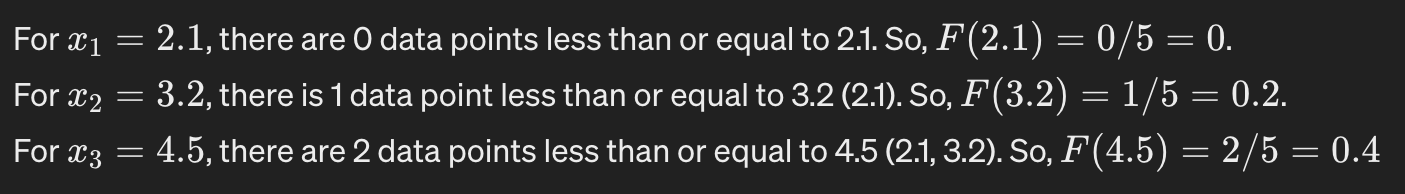

### 2. CDF calculation

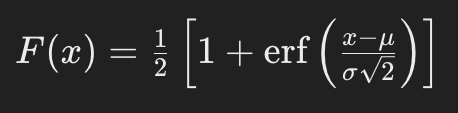

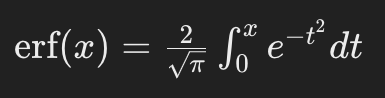

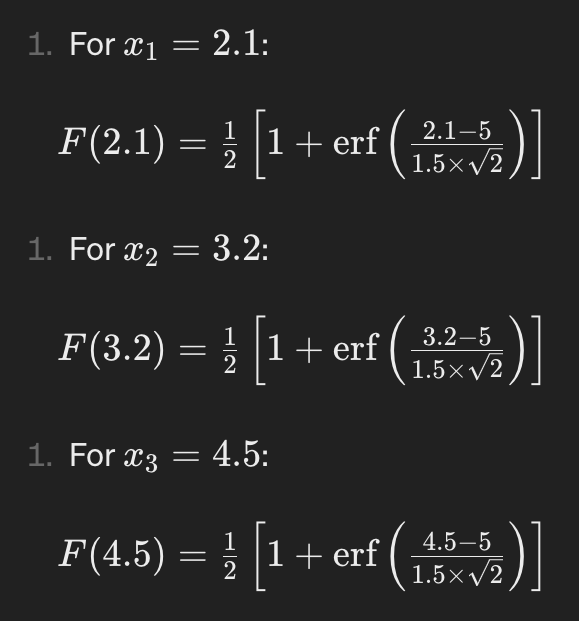

### 3. KS calculation

### ECDF(3.2)=0.2

### CDF(3.2)=0.15


### KS = ∣ECDF(3.2)−CDF(3.2)∣=∣0.2−0.15∣ =∣0.05∣ =0.05

### 4. p Value calculation

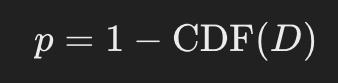

### CDF(0.05) = 0.8 

### p_value =1−CDF(D)=1−0.8=0.2

In [290]:
from scipy import stats


for i in data.columns:
    
    if data[i].dtype in ['int64', 'float64']:
        
        kstest_statistic, kstest_p_value = stats.kstest(data[i], 'norm')
        
        # 'norm' inside indicates that the test is comparing the distribution of the data against a normal distribution
        
        print(f'Column: {i}')
        print(f'Kolmogorov-Smirnov Test:')
        print(f'Test Statistic: {kstest_statistic}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
        else:
            print('Data does not look normally distributed')
            print()

Column: Price
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: Mileage
Kolmogorov-Smirnov Test:
Test Statistic: 0.9305755678068792
p-value: 0.0
Data does not look normally distributed

Column: EngineV
Kolmogorov-Smirnov Test:
Test Statistic: 0.8978768811388997
p-value: 0.0
Data does not look normally distributed

Column: Year
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: EngineV_mean_by_Engine_Type
Kolmogorov-Smirnov Test:
Test Statistic: 0.9898881030857718
p-value: 0.0
Data does not look normally distributed

Column: EngineV_sum_by_Engine_Type
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: EngineV_min_by_Engine_Type
Kolmogorov-Smirnov Test:
Test Statistic: 0.7257468822499265
p-value: 0.0
Data does not look normally distributed

Column: Mileage_mean_by_Year
Kolmogorov-Smirnov Test:
Test Statistic: 0.9480745341

# When data is normal distributed

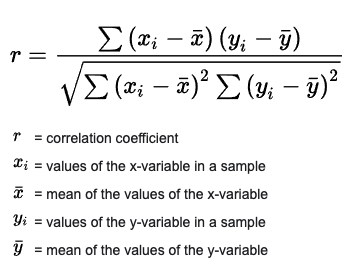

In [291]:
def target_correlation(data, target, threshold=0.6):
    
    corr_matrix = data.corr(numeric_only=True)
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target


In [292]:
target_result = target_correlation(data, 'Price')

target_result

,Variable,Correlation with Target
0,Mileage,-0.602385
1,Year,0.663267
2,Mileage_mean_by_Year,-0.719214


In [293]:
def intercorrelation(data, target, threshold=0.8):
    
    corr_matrix = data.drop(columns=[target]).corr(numeric_only=True)
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    print(highly_correlated_variables)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    print(independent_variable_pairs)
    
    result_intercorrelated_independent = pd.DataFrame({
        'Variable 1': corr_matrix.index[independent_variable_pairs[0]],
        'Variable 2': corr_matrix.columns[independent_variable_pairs[1]]
    })
    return result_intercorrelated_independent


In [294]:
intercorrelated_result = intercorrelation(data, 'Price')

intercorrelated_result

                                       Mileage  EngineV   Year  \
Mileage                                  False    False  False   
EngineV                                  False    False  False   
Year                                     False    False  False   
EngineV_mean_by_Engine_Type              False    False  False   
EngineV_sum_by_Engine_Type               False    False  False   
EngineV_min_by_Engine_Type               False    False  False   
Mileage_mean_by_Year                     False    False   True   
Mileage_sum_by_Year                      False    False  False   
Mileage_min_by_Year                      False    False  False   
Mileage_max_by_Year                      False    False  False   
EngineV_mean_by_Brand                    False    False  False   
EngineV_sum_by_Brand                     False    False  False   
EngineV_min_by_Brand                     False    False  False   
EngineV_mean_by_Engine_Type_Body_Type    False    False  False   
EngineV_su

,Variable 1,Variable 2
0,Year,Mileage_mean_by_Year
1,Mileage_mean_by_Year,Year
2,EngineV_sum_by_Brand,EngineV_min_by_Brand
3,EngineV_sum_by_Brand,Model_count_by_Brand
4,EngineV_sum_by_Brand,Model_nunique_by_Brand
5,EngineV_min_by_Brand,EngineV_sum_by_Brand
6,EngineV_min_by_Brand,Model_nunique_by_Brand
7,Model_count_by_Brand,EngineV_sum_by_Brand
8,Model_nunique_by_Brand,EngineV_sum_by_Brand
9,Model_nunique_by_Brand,EngineV_min_by_Brand


# When data is not normal distributed

## Spearman correlation

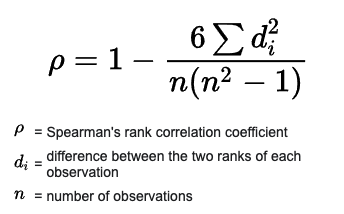

## data

### x={10,20,15,25,30}

### y={45,90,80,70,25}

## sort them

### x = {10,15,20,25,30}
### y = {25,45,70,80,90}

## rank them

### x = {1,3,2,4,5}
### y = {2,5,4,3,1}

## calculate d(i)

### 1. d(i) = Rank(x) - Rank(y) = [ -1, -2, -2, 1, 4 ]

### 2. sqr(d(i)) = [1,4,4,1,16]

### 3. sum = 26

In [295]:
def target_correlation(data, target, threshold=0.4):
    corr_matrix = data.corr(method='spearman', numeric_only=True)
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target


In [296]:
target_result = target_correlation(data, 'Price')

target_result

,Variable,Correlation with Target
0,Mileage,-0.619828
1,EngineV,0.414409
2,Year,0.760222
3,Mileage_mean_by_Year,-0.753731
4,Mileage_max_by_Year,-0.455467
5,EngineV_mean_by_Engine_Type_Body_Type,0.437900


In [297]:
def intercorrelation(data, target, threshold=0.8):
    corr_matrix = data.drop(columns=[target]).corr(method='spearman', numeric_only=True)
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    print(highly_correlated_variables)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    print(independent_variable_pairs)
    
    result_intercorrelated_independent = pd.DataFrame({
        'Variable 1': corr_matrix.index[independent_variable_pairs[0]],
        'Variable 2': corr_matrix.columns[independent_variable_pairs[1]]
    })
    return result_intercorrelated_independent


In [298]:
intercorrelated_result = intercorrelation(data, 'Price')

intercorrelated_result

                                       Mileage  EngineV   Year  \
Mileage                                  False    False  False   
EngineV                                  False    False  False   
Year                                     False    False  False   
EngineV_mean_by_Engine_Type              False    False  False   
EngineV_sum_by_Engine_Type               False    False  False   
EngineV_min_by_Engine_Type               False    False  False   
Mileage_mean_by_Year                     False    False   True   
Mileage_sum_by_Year                      False    False  False   
Mileage_min_by_Year                      False    False  False   
Mileage_max_by_Year                      False    False  False   
EngineV_mean_by_Brand                    False    False  False   
EngineV_sum_by_Brand                     False    False  False   
EngineV_min_by_Brand                     False    False  False   
EngineV_mean_by_Engine_Type_Body_Type    False    False  False   
EngineV_su

,Variable 1,Variable 2
0,Year,Mileage_mean_by_Year
1,EngineV_mean_by_Engine_Type,EngineV_sum_by_Engine_Type
2,EngineV_sum_by_Engine_Type,EngineV_mean_by_Engine_Type
3,Mileage_mean_by_Year,Year
4,EngineV_sum_by_Brand,EngineV_min_by_Brand
5,EngineV_sum_by_Brand,Model_nunique_by_Brand
6,EngineV_min_by_Brand,EngineV_sum_by_Brand
7,EngineV_min_by_Brand,Model_nunique_by_Brand
8,Model_nunique_by_Brand,EngineV_sum_by_Brand
9,Model_nunique_by_Brand,EngineV_min_by_Brand


In [299]:
target_result.Variable.tolist()

['Mileage',
 'EngineV',
 'Year',
 'Mileage_mean_by_Year',
 'Mileage_max_by_Year',
 'EngineV_mean_by_Engine_Type_Body_Type']

# Multicollinearity between independent features

In [304]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result


vif_result = calculate_vif(data, [
                                            'Mileage',
                                             'EngineV',
 #                                            'Year',
#                                           'Mileage_mean_by_Year',
 #                                            'Mileage_max_by_Year',
 #                                            'EngineV_mean_by_Engine_Type_Body_Type'
                                        ])

vif_result


,VIF,Features
0,2.715583,Mileage
1,2.715583,EngineV


## Checking the Linearity assumptions

In [233]:
print ('Mileage - :',data['Mileage'].corr(data['Price'], method='spearman'))
print ('EngineV - :',data['EngineV'].corr(data['Price'], method='spearman'))

Mileage - : -0.6198277249953791
EngineV - : 0.4144089087098171


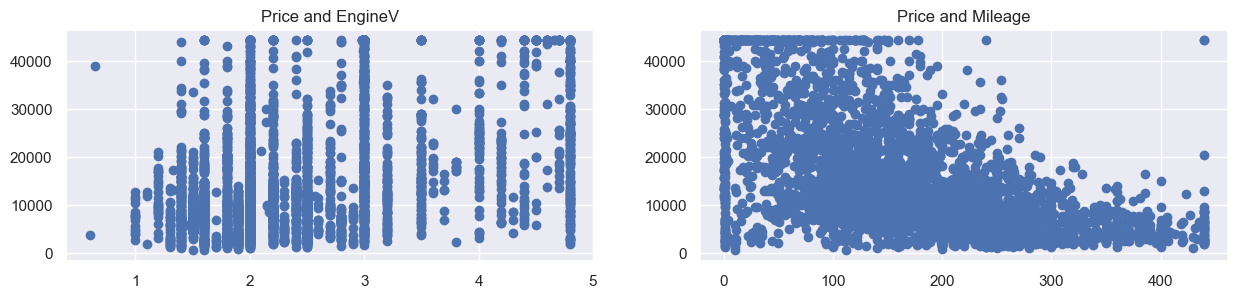

In [234]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize =(15,3))

ax1.scatter(data['EngineV'],data['Price'])
ax1.set_title('Price and EngineV')

ax2.scatter(data['Mileage'],data['Price'])
ax2.set_title('Price and Mileage')


plt.show()

In [236]:
log_price = np.log(data['Price'])

data['log_price'] = log_price
data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,EngineV_mean_by_Engine_Type,...,EngineV_mean_by_Brand,EngineV_sum_by_Brand,EngineV_min_by_Brand,EngineV_mean_by_Engine_Type_Body_Type,EngineV_sum_by_Engine_Type_Body_Type,EngineV_min_by_Engine_Type_Body_Type,EngineV_max_by_Engine_Type_Body_Type,Model_count_by_Brand,Model_nunique_by_Brand,log_price
0,BMW,4200.0,sedan,277.0,2.0,Petrol,yes,1991.0,320,2.533093,...,2.828750,1810.40,0.65,2.474280,1942.31,1.2,4.8,640,49,8.342840
1,Mercedes-Benz,7900.0,van,427.0,2.9,Diesel,yes,1999.0,Sprinter 212,2.335347,...,2.909307,2394.36,0.60,2.036772,1154.85,1.0,4.8,823,108,8.974618
2,Mercedes-Benz,13300.0,sedan,358.0,4.8,Gas,yes,2003.0,S 500,2.661695,...,2.909307,2394.36,0.60,2.451007,730.40,1.2,4.8,823,108,9.495519
3,Audi,23000.0,crossover,240.0,4.2,Petrol,yes,2007.0,Q7,2.533093,...,2.578500,1082.97,1.20,3.352759,875.07,1.2,4.8,420,20,10.043249
4,Toyota,18300.0,crossover,120.0,2.0,Petrol,yes,2011.0,Rav 4,2.533093,...,2.729118,1391.85,1.00,3.352759,875.07,1.2,4.8,510,36,9.814656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,Toyota,17900.0,sedan,35.0,1.6,Petrol,yes,2014.0,Corolla,2.533093,...,2.729118,1391.85,1.00,2.474280,1942.31,1.2,4.8,510,36,9.792556
4021,Mercedes-Benz,44251.5,sedan,9.0,3.0,Diesel,yes,2014.0,S 350,2.335347,...,2.909307,2394.36,0.60,2.483079,1008.13,1.4,4.8,823,108,10.697645
4022,BMW,6500.0,sedan,1.0,3.5,Petrol,yes,1999.0,535,2.533093,...,2.828750,1810.40,0.65,2.474280,1942.31,1.2,4.8,640,49,8.779557
4023,BMW,8000.0,sedan,194.0,2.0,Petrol,yes,1989.5,520,2.533093,...,2.828750,1810.40,0.65,2.474280,1942.31,1.2,4.8,640,49,8.987197


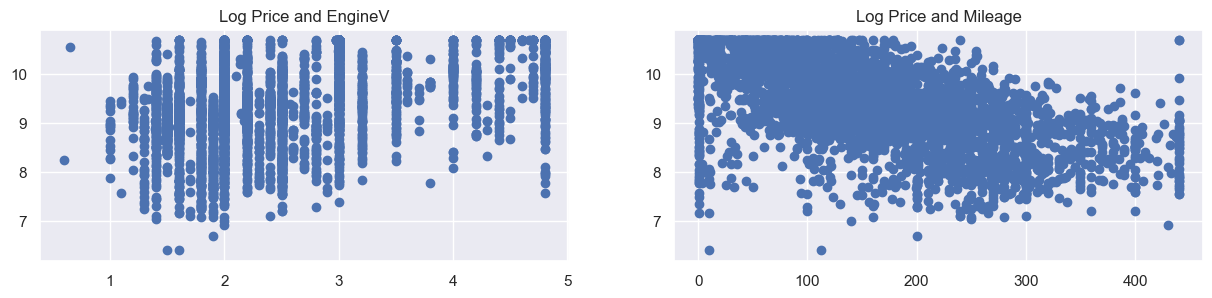

In [243]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize =(15,3))

ax1.scatter(data['EngineV'],data['log_price'])
ax1.set_title('Log Price and EngineV')

ax2.scatter(data['Mileage'],data['log_price'])
ax2.set_title('Log Price and Mileage')


plt.show()

In [237]:
numeric_columns = []
categorical_columns = []

for column in data.columns:
    if data[column].dtype==object:
        categorical_columns.append(column)
    else:
        numeric_columns.append(column)

In [238]:
numeric_columns

['Price',
 'Mileage',
 'EngineV',
 'Year',
 'EngineV_mean_by_Engine_Type',
 'EngineV_sum_by_Engine_Type',
 'EngineV_min_by_Engine_Type',
 'Mileage_mean_by_Year',
 'Mileage_sum_by_Year',
 'Mileage_min_by_Year',
 'Mileage_max_by_Year',
 'EngineV_mean_by_Brand',
 'EngineV_sum_by_Brand',
 'EngineV_min_by_Brand',
 'EngineV_mean_by_Engine_Type_Body_Type',
 'EngineV_sum_by_Engine_Type_Body_Type',
 'EngineV_min_by_Engine_Type_Body_Type',
 'EngineV_max_by_Engine_Type_Body_Type',
 'Model_count_by_Brand',
 'Model_nunique_by_Brand',
 'log_price']

In [239]:
categorical_columns

['Brand', 'Body', 'Engine Type', 'Registration', 'Model']

In [240]:
data = data[['Brand', 'Body', 'Engine Type', 'Registration', 'Model','Mileage','EngineV','log_price']]

data

,Brand,Body,Engine Type,Registration,Model,Mileage,EngineV,log_price
0,BMW,sedan,Petrol,yes,320,277.0,2.0,8.342840
1,Mercedes-Benz,van,Diesel,yes,Sprinter 212,427.0,2.9,8.974618
2,Mercedes-Benz,sedan,Gas,yes,S 500,358.0,4.8,9.495519
3,Audi,crossover,Petrol,yes,Q7,240.0,4.2,10.043249
4,Toyota,crossover,Petrol,yes,Rav 4,120.0,2.0,9.814656
...,...,...,...,...,...,...,...,...
4020,Toyota,sedan,Petrol,yes,Corolla,35.0,1.6,9.792556
4021,Mercedes-Benz,sedan,Diesel,yes,S 350,9.0,3.0,10.697645
4022,BMW,sedan,Petrol,yes,535,1.0,3.5,8.779557
4023,BMW,sedan,Petrol,yes,520,194.0,2.0,8.987197


In [241]:
data.describe(include='all')

,Brand,Body,Engine Type,Registration,Model,Mileage,EngineV,log_price
count,4025,4025,4025,4025,4025,4025.000000,4025.000000,4025.000000
unique,7,6,4,2,306,NaN,NaN,NaN
top,Volkswagen,sedan,Diesel,yes,E-Class,NaN,NaN,NaN
freq,880,1534,1861,3654,188,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,162.744099,2.454959,9.362662
std,NaN,NaN,NaN,NaN,NaN,100.166361,0.912399,0.840327
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.600000,6.396930
25%,NaN,NaN,NaN,NaN,NaN,90.000000,1.800000,8.853523
50%,NaN,NaN,NaN,NaN,NaN,158.000000,2.200000,9.350102
75%,NaN,NaN,NaN,NaN,NaN,230.000000,3.000000,9.994242


## Variables of interest

In [242]:
data.drop('Model', axis=1, inplace=True)

data

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_66464/1371727949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop('Model', axis=1, inplace=True)


,Brand,Body,Engine Type,Registration,Mileage,EngineV,log_price
0,BMW,sedan,Petrol,yes,277.0,2.0,8.342840
1,Mercedes-Benz,van,Diesel,yes,427.0,2.9,8.974618
2,Mercedes-Benz,sedan,Gas,yes,358.0,4.8,9.495519
3,Audi,crossover,Petrol,yes,240.0,4.2,10.043249
4,Toyota,crossover,Petrol,yes,120.0,2.0,9.814656
...,...,...,...,...,...,...,...
4020,Toyota,sedan,Petrol,yes,35.0,1.6,9.792556
4021,Mercedes-Benz,sedan,Diesel,yes,9.0,3.0,10.697645
4022,BMW,sedan,Petrol,yes,1.0,3.5,8.779557
4023,BMW,sedan,Petrol,yes,194.0,2.0,8.987197


## Create dummy variables (Conversion)

In [245]:
data = pd.get_dummies(data, drop_first=True)

data

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277.0,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427.0,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358.0,4.8,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240.0,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120.0,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,35.0,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4021,9.0,3.0,10.697645,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4022,1.0,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4023,194.0,2.0,8.987197,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


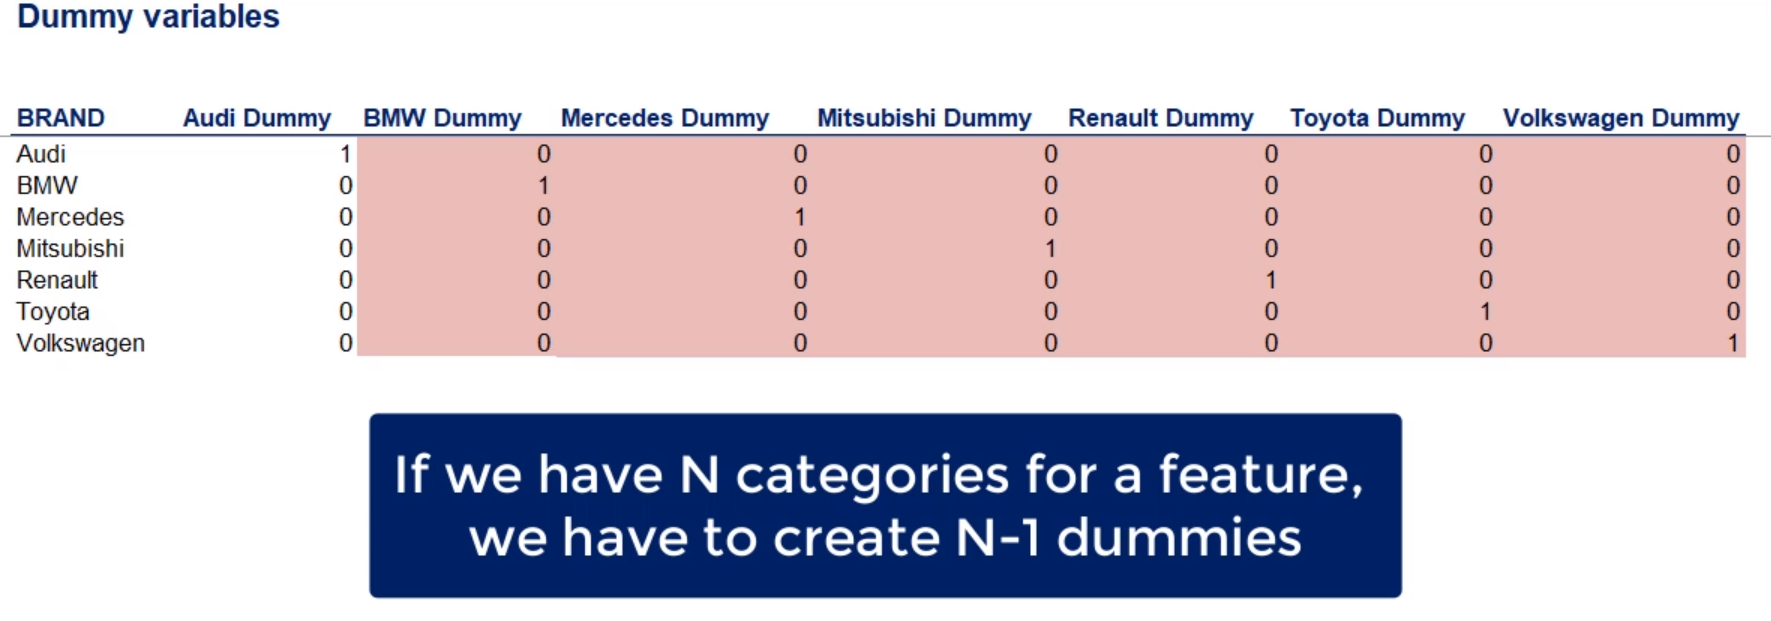

## Declare the inputs and the targets

In [246]:
targets = data['log_price']

inputs = data.drop(['log_price'],axis=1)

## Scale the data

In [247]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(inputs) # Fit the inputs (calculate the mean and standard deviation feature-wise)

StandardScaler()

In [248]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(inputs)

data_scaled = pd.DataFrame(inputs_scaled, columns=inputs.columns)

data_scaled

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,1.140803,-0.498702,2.299796,-0.506978,-0.287352,-0.352564,-0.380910,-0.528970,-0.267083,-0.329409,1.274307,-0.322412,-0.429152,-0.414441,-0.164462,1.319782,0.318642
1,2.638498,0.487831,-0.434821,1.972472,-0.287352,-0.352564,-0.380910,-0.528970,-0.267083,-0.329409,-0.784740,-0.322412,2.330174,-0.414441,-0.164462,-0.757701,0.318642
2,1.949558,2.570511,-0.434821,1.972472,-0.287352,-0.352564,-0.380910,-0.528970,-0.267083,-0.329409,1.274307,-0.322412,-0.429152,2.412889,-0.164462,-0.757701,0.318642
3,0.771372,1.912823,-0.434821,-0.506978,-0.287352,-0.352564,-0.380910,-0.528970,-0.267083,-0.329409,-0.784740,-0.322412,-0.429152,-0.414441,-0.164462,1.319782,0.318642
4,-0.426784,-0.498702,-0.434821,-0.506978,-0.287352,-0.352564,2.625292,-0.528970,-0.267083,-0.329409,-0.784740,-0.322412,-0.429152,-0.414441,-0.164462,1.319782,0.318642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4020,-1.275478,-0.937161,-0.434821,-0.506978,-0.287352,-0.352564,2.625292,-0.528970,-0.267083,-0.329409,1.274307,-0.322412,-0.429152,-0.414441,-0.164462,1.319782,0.318642
4021,-1.535078,0.597445,-0.434821,1.972472,-0.287352,-0.352564,-0.380910,-0.528970,-0.267083,-0.329409,1.274307,-0.322412,-0.429152,-0.414441,-0.164462,-0.757701,0.318642
4022,-1.614955,1.145519,2.299796,-0.506978,-0.287352,-0.352564,-0.380910,-0.528970,-0.267083,-0.329409,1.274307,-0.322412,-0.429152,-0.414441,-0.164462,1.319782,0.318642
4023,0.312079,-0.498702,2.299796,-0.506978,-0.287352,-0.352564,-0.380910,-0.528970,-0.267083,-0.329409,1.274307,-0.322412,-0.429152,-0.414441,-0.164462,1.319782,0.318642


## Train Test Split

In [249]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_scaled, targets, test_size=0.2, random_state=42)

## Create the Linear regression

In [250]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [251]:
reg.intercept_

9.364660865946401

In [254]:
reg.coef_

array([-0.42116766,  0.20541386,  0.02596386,  0.00987658, -0.1081519 ,
       -0.16434324, -0.03633292, -0.06494909, -0.14525968, -0.08036931,
       -0.17981028, -0.09907552, -0.13603609, -0.11403871, -0.03310536,
       -0.12847986,  0.30613285])

In [257]:
y_pred = reg.predict(X_test)

mae_test = metrics.mean_absolute_error(y_test, y_pred)
mse_test = metrics.mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = metrics.r2_score(y_test, y_pred)

y_pred_train = reg.predict(X_train)

mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(y_train, y_pred_train)

results_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}

results_df = pd.DataFrame(results_dict)

results_df

,Metric,Train,Test
0,MAE,0.318034,0.310323
1,MSE,0.201366,0.204119
2,RMSE,0.448738,0.451795
3,R2,0.713670,0.715193


## Univariate Analysis of each variables

In [258]:
results = []

for i in X_train.columns: 
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    reg.fit(X_train_single_var, y_train)
    
    y_pred_train_single_var = reg.predict(X_train_single_var)

    train_r2 = metrics.r2_score(y_train, y_pred_train_single_var)

    y_pred_test_single_var = reg.predict(X_test_single_var)

    test_r2 = metrics.r2_score(y_test, y_pred_test_single_var)

    results.append({'Variable': i, 'Train R2': train_r2, 'Test R2': test_r2})

results_df = pd.DataFrame(results)

results_df_sorted = results_df.sort_values(by='Test R2', ascending=False)

results_df_sorted


,Variable,Train R2,Test R2
0,Mileage,0.348149,0.398348
16,Registration_yes,0.208680,0.213625
1,EngineV,0.172272,0.150779
5,Brand_Renault,0.042249,0.034713
11,Body_vagon,0.029368,0.031474
10,Body_sedan,0.018012,0.031250
6,Brand_Toyota,0.023669,0.024104
7,Brand_Volkswagen,0.008591,0.021893
12,Body_van,0.010768,0.018598
3,Brand_Mercedes-Benz,0.016259,0.012630


## Build model using selected variables

In [259]:
inputs = data_scaled[['Mileage', 'EngineV','Registration_yes']]

In [260]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [261]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [262]:
y_pred = reg.predict(X_test)

mae_test = metrics.mean_absolute_error(y_test, y_pred)
mse_test = metrics.mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = metrics.r2_score(y_test, y_pred)

y_pred_train = reg.predict(X_train)

mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
mse_train = metrics.mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = metrics.r2_score(y_train, y_pred_train)

results_dict = {
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'Train': [mae_train, mse_train, rmse_train, r2_train],
    'Test': [mae_test, mse_test, rmse_test, r2_test]
}

results_df = pd.DataFrame(results_dict)

results_df

,Metric,Train,Test
0,MAE,0.387583,0.384571
1,MSE,0.269837,0.270488
2,RMSE,0.519459,0.520084
3,R2,0.616308,0.622589
